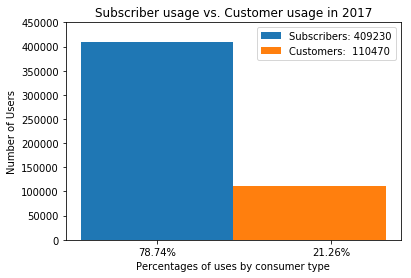

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline
df = pd.read_csv('2017-fordgobike-tripdata.csv')
non_sub_count=len(df[df['user_type']=='Customer'])
sub_count=len(df[df['user_type']=='Subscriber'])

N = 1
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, sub_count, width)
p2 = plt.bar(ind+width, non_sub_count, width)

plt.ylabel('Number of Users')
plt.xlabel('Percentages of uses by consumer type')
plt.title('Subscriber usage vs. Customer usage in 2017')
plt.xticks(np.arange(0, .80, step=0.40), ('{0:.2f}%'.format(100*sub_count/(non_sub_count+sub_count)),'{0:.2f}%'.format(100*non_sub_count/(non_sub_count+sub_count))))
plt.yticks(np.arange(0, 500000,step=50000))
plt.legend((p1[0], p2[0]), ('Subscribers: {}'.format(sub_count), 'Customers:  {}'.format(non_sub_count)))

plt.show()

## Pricing of Go Ford Bike
### Customers
Single ride (up to 30 minutes) - 3.00

Day Access (unlimited 30 minute rides) - 10.00

3 Day Access (unlimited 30 minute rides) - 20.00

### Subscribers
Monthly Subscriber(unlimited 45 minutes) - 15.00

### Late Fees
Bikes kept out longer than allowed trip time - 3.00 per 15 minutes

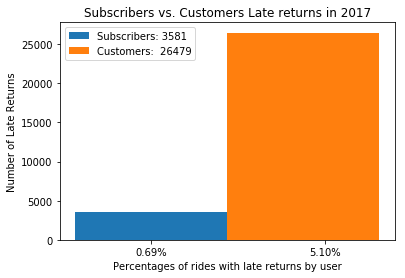

In [3]:
# want to obtain the amount of income from subscribers versus customers
# to change for seconds to minutes need to use module 60 and divide by 60
# need to obtain a list of customer that went over their allowed time, use divide 15 to see increments
late_group = df[df['duration_sec'] > 1800]
sub_late_group = late_group[late_group['duration_sec'] > 2700]
non_sub_late=late_group[late_group['user_type']=='Customer']
#Note that subscribers have a time limit of 45 minutes
sub_late=sub_late_group[sub_late_group['user_type']=='Subscriber']

N = 1
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, len(sub_late), width)
p2 = plt.bar(ind+width, len(non_sub_late), width)

plt.ylabel('Number of Late Returns')
plt.xlabel('Percentages of rides with late returns by user')
plt.title('Subscribers vs. Customers Late returns in 2017')
plt.xticks(np.arange(0, .80, step=0.40), ('{0:.2f}%'.format(100*len(sub_late)/((non_sub_count+sub_count))),'{0:.2f}%'.format(100*len(non_sub_late)/(non_sub_count+sub_count))))
plt.yticks(np.arange(0, 30000,step=5000))
plt.legend((p1[0], p2[0]), ('Subscribers: {}'.format(len(sub_late)), 'Customers:  {}'.format(len(non_sub_late))))

plt.show()

In [4]:
# make a list containing the number of seconds that subs went over
# can only be ran once due to stacking values
non_sub_late['duration_sec']=non_sub_late['duration_sec']- 1800
sub_late['duration_sec']=sub_late['duration_sec']-2700

c:\users\family\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\family\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


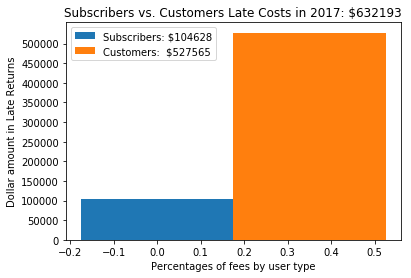

In [5]:
#list_seconds_sub = np.arange(len(sub_late))
#list_seconds_non = np.arange(len(non_sub_late))
#time_sub_late = sub_late['duration_sec']
#time_non_late = non_sub_late['duration_sec']
#list_seconds_sub = time_sub_late
#list_seconds_non = time_non_late
#list_seconds_sub -= 2700
#list_seconds_non -= 1800
#list_seconds_sub = np.rint(list_seconds_sub/60)
#list_seconds_non = np.rint(list_seconds_non/60)
#list_seconds_sub
# Prints minutes overdue
#non_sub_late['duration_sec']- 1800
#sub_late['duration_sec']-2700
non_sub_late_income=non_sub_late[['user_type','duration_sec']].groupby('user_type').sum()
sub_late_income=sub_late[['user_type','duration_sec']].groupby('user_type').sum()
#divide by 60 to obtain minutes
non_sub_late_income['duration_sec']=non_sub_late_income['duration_sec']/60
sub_late_income['duration_sec']=sub_late_income['duration_sec']/60
#divide by 15 to see the total increments that they went over 
non_sub_late_income['duration_sec']=math.ceil(non_sub_late_income['duration_sec']/15)
sub_late_income['duration_sec']=math.ceil(sub_late_income['duration_sec']/15)
# multiply by 3 per 15
non_sub_late_income['duration_sec']=non_sub_late_income['duration_sec']*3
sub_late_income['duration_sec']=sub_late_income['duration_sec']*3

N = 1
ind = np.arange(N)
width = 0.35

p1 = plt.bar(ind, sub_late_income['duration_sec'], width)
p2 = plt.bar(ind+width, non_sub_late_income['duration_sec'], width)

plt.ylabel('Dollar amount in Late Returns')
plt.xlabel('Percentages of fees by user type')
plt.title('Subscribers vs. Customers Late Costs in 2017: ${}'.format(sub_late_income['duration_sec'][0]+non_sub_late_income['duration_sec'][0]))
#plt.xticks(np.arange(0, 1, step=0.5), ('{}'.format('Subscribers')),'{}'.format('Customers'))
plt.yticks(np.arange(0, 530000,step=50000))
plt.legend((p1[0], p2[0]), ('Subscribers: ${}'.format(sub_late_income['duration_sec'][0]), 'Customers:  ${}'.format(non_sub_late_income['duration_sec'][0])))

plt.show()

In [6]:
df_route=df[['start_station_name','end_station_name','duration_sec']].groupby(['start_station_name','end_station_name']).count().sort_values('duration_sec', ascending=False)
route_20=df_route.reset_index().head(20)

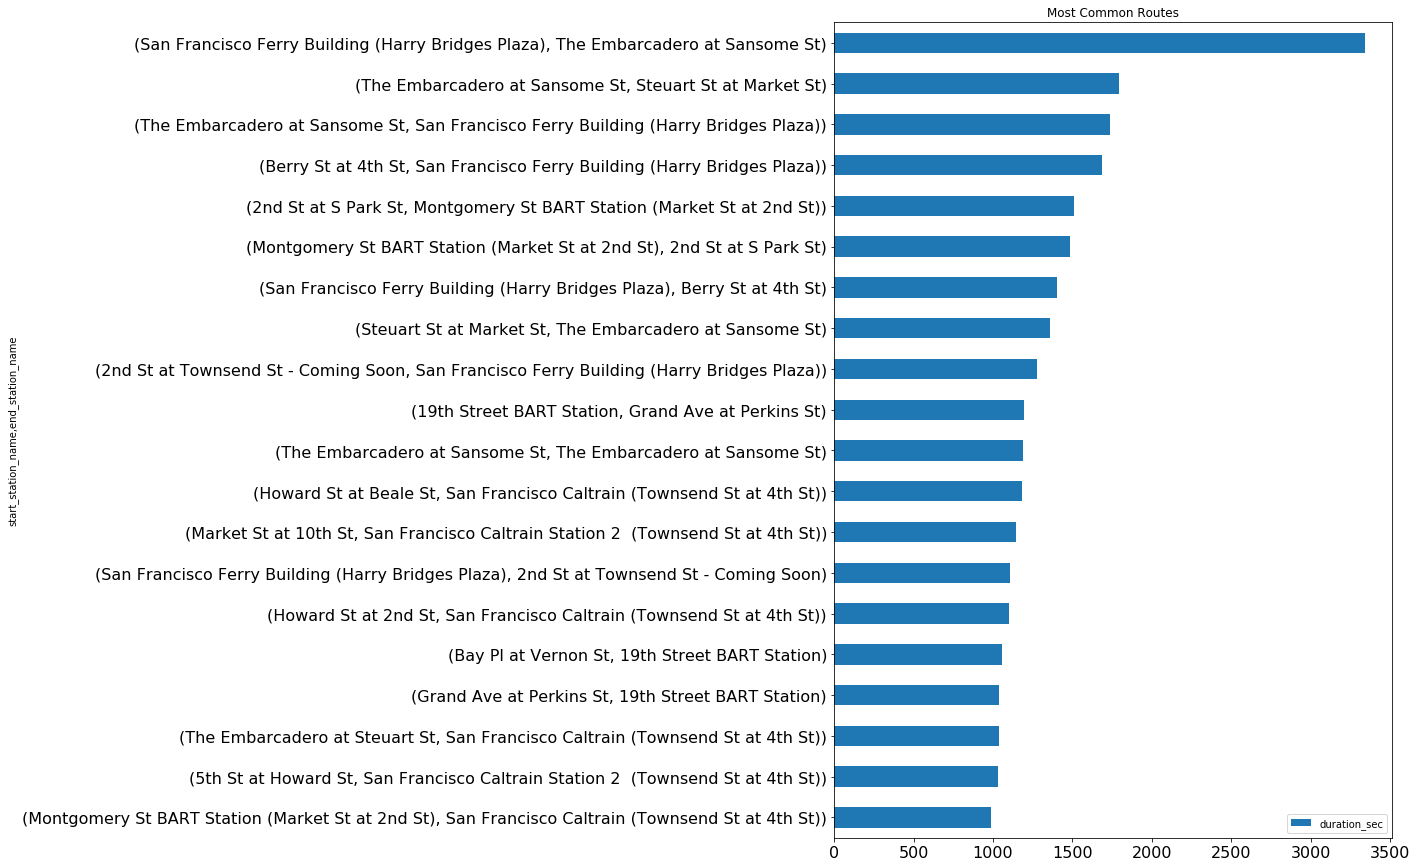

In [7]:
df_route.head(20).sort_values('duration_sec',ascending=True).plot(title='Most Common Routes',kind='barh',figsize=(10,15),fontsize=16,sort_columns=True)

Text(0.5,0,'Distance is Kilometers')

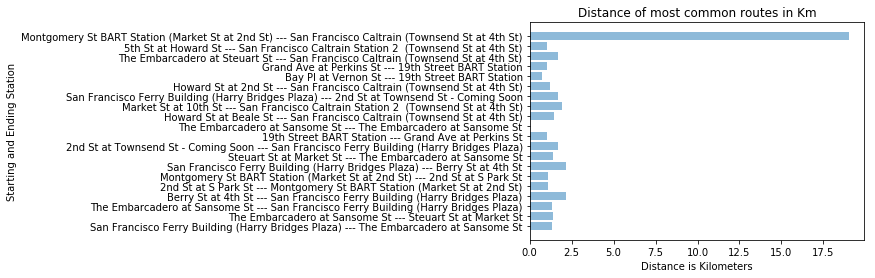

In [8]:

df_route_distance = df[['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','duration_sec']].groupby(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).count().sort_values('duration_sec', ascending=False)

distance_df = np.arange(20,dtype=np.float)
#Make list, find distance, save that distance to new list
# approximate radius of earth in km
R = 6373.0
for m in range(0,19):
    start_lat = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'start_station_latitude'])
    start_long = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'start_station_longitude'])
    end_lat = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'end_station_latitude'])
    end_long = math.radians(df_route_distance.add_suffix('_Count').reset_index().loc[m,'end_station_longitude'])
    
    dlon = end_long - start_long
    dlat = end_lat - start_lat

    a = math.sin(dlat / 2)**2 + math.cos(start_lat) * math.cos(end_lat) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance_df[m] = R * c
    
route_20['Distance']=distance_df
route_20['Trip']=route_20['start_station_name'].map(str)+" --- "+route_20['end_station_name']
plt.barh(route_20['Trip'], route_20['Distance'], align='center', alpha=0.5)
plt.title('Distance of most common routes in Km')
plt.ylabel('Starting and Ending Station')
plt.xlabel('Distance is Kilometers')

In [9]:
from datetime import datetime

df['start_time']=df['start_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))
df['end_time']=df['end_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f'))

In [10]:
df_time_index=df.set_index('start_time')

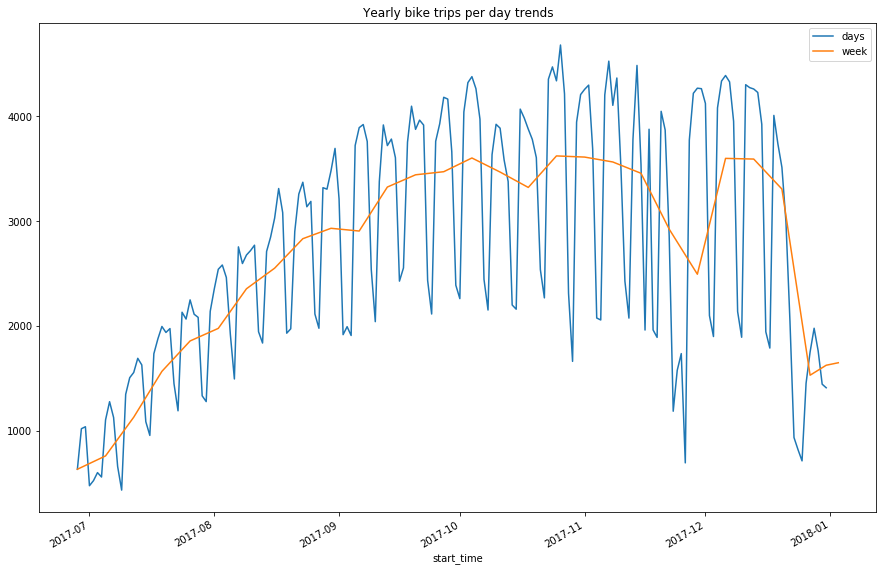

In [11]:
df_resample=df_time_index['duration_sec'].resample('D').count()
df_resample_week = df_resample.resample('W-WED').mean()
df_resample_day_and_week=pd.concat([df_resample,df_resample_week], axis=1)
df_resample_day_and_week.columns=['days','week']
df_resample_day_and_week
df_resample_day_and_week['week']=df_resample_day_and_week['week'].interpolate()
df_resample_day_and_week.plot(figsize=(15,10),title='Yearly bike trips per day trends')
#do it hourly with mean
#do it weekly, join with daily for trend
#groupby and then pivot(for stations)

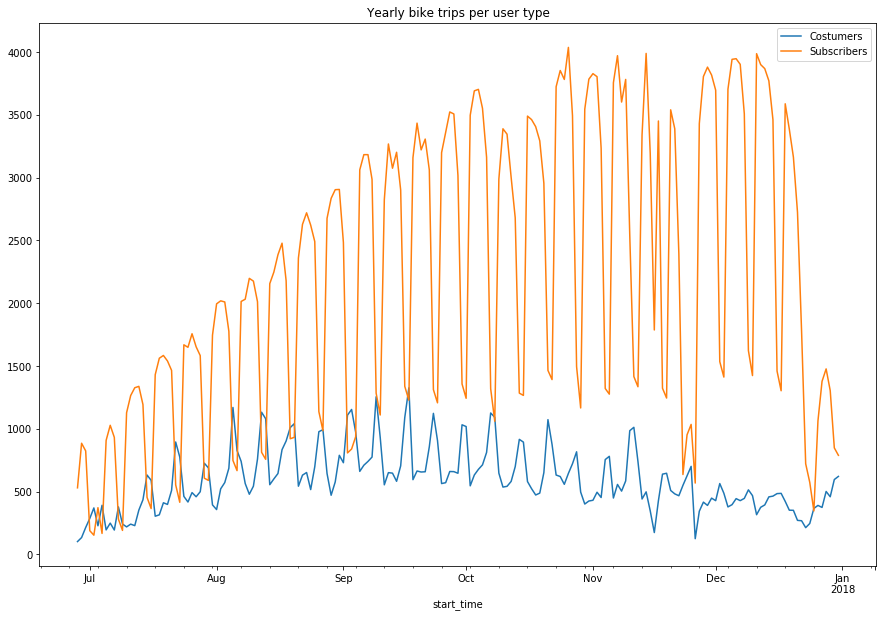

In [12]:
df_cus_time=df_time_index[df_time_index['user_type']=='Customer'].resample('D').count()
df_sub_time=df_time_index[df_time_index['user_type']=='Subscriber'].resample('D').count()
df_user_time=pd.concat([df_cus_time['duration_sec'],df_sub_time['end_time']], axis=1)
df_user_time.columns=['Costumers','Subscribers']
df_user_time.plot(figsize=(15,10),title='Yearly bike trips per user type')

Text(0.5,1,'Thanksgiving Hours of Data')

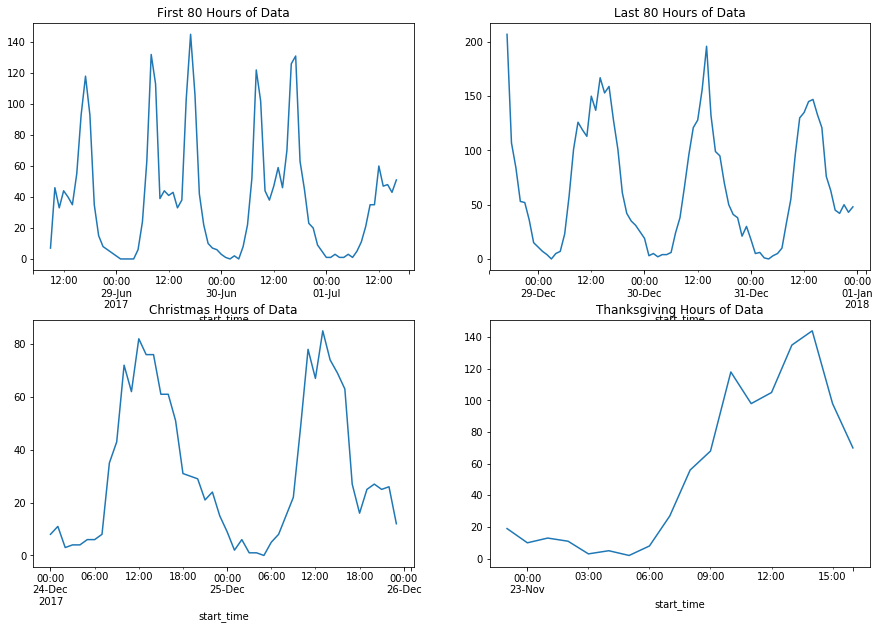

In [13]:
df_resample_hour=df_time_index['duration_sec'].resample('H').count()
fig, axes = plt.subplots(nrows=2, ncols=2)
df_resample_hour.iloc[0:80].plot(ax=axes[0,0],figsize=(15,10))
axes[0,0].set_title('First 80 Hours of Data')
df_resample_hour.iloc[4400:4500].plot(ax=axes[0,1],figsize=(15,10))
axes[0,1].set_title('Last 80 Hours of Data')
df_resample_hour.iloc[4287:4335].plot(ax=axes[1,0],figsize=(15,10))
axes[1,0].set_title('Christmas Hours of Data')
df_resample_hour.iloc[3542:3560].plot(ax=axes[1,1],figsize=(15,10))
axes[1,1].set_title('Thanksgiving Hours of Data')

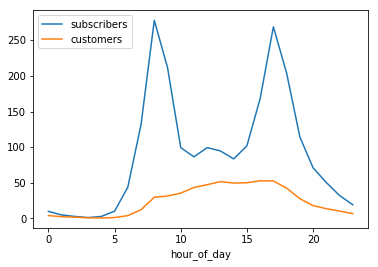

In [76]:
df_mean_day_sub=df_time_index[df_time_index['user_type']=='Subscriber']
df_mean_day_cus=df_time_index[df_time_index['user_type']=='Customer']
df_mean_day_sub=df_mean_day_sub['duration_sec'].resample('H').count()
df_mean_day_cus=df_mean_day_cus['duration_sec'].resample('H').count()
df_mean_day_sub=df_mean_day_sub.reset_index()
df_mean_day_cus=df_mean_day_cus.reset_index()
df_mean_day_sub['hour_of_day']=df_mean_day_sub['start_time'].dt.hour
df_mean_day_cus['hour_of_day']=df_mean_day_cus['start_time'].dt.hour
df_mean_day_sub.columns=['start_time','subscribers','hour_of_day']
df_mean_day_cus.columns=['start_time','customers','hour_of_day']
df_mean_day_sub=df_mean_day_sub[['subscribers','hour_of_day']].groupby('hour_of_day').mean()
df_mean_day_cus=df_mean_day_cus[['customers','hour_of_day']].groupby('hour_of_day').mean()
df_mean_day_sub['customers']=df_mean_day_cus['customers']
df_mean_day_sub.plot()

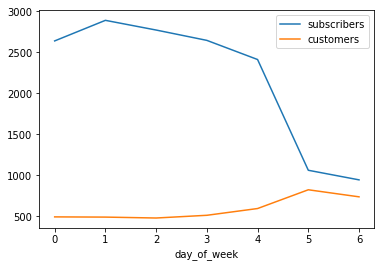

In [71]:
df_mean_week_sub=df_time_index[df_time_index['user_type']=='Subscriber']
df_mean_week_cus=df_time_index[df_time_index['user_type']=='Customer']
df_mean_week_sub=df_mean_week_sub['duration_sec'].resample('D').count()
df_mean_week_cus=df_mean_week_cus['duration_sec'].resample('D').count()
df_mean_week_sub=df_mean_week_sub.reset_index()
df_mean_week_cus=df_mean_week_cus.reset_index()
df_mean_week_sub['day_of_week']=df_mean_week_sub['start_time'].dt.dayofweek
df_mean_week_cus['day_of_week']=df_mean_week_cus['start_time'].dt.dayofweek
df_mean_week_sub.columns=['start_time','subscribers','day_of_week']
df_mean_week_cus.columns=['start_time','customers','day_of_week']
df_mean_week_sub=df_mean_week_sub[['subscribers','day_of_week']].groupby('day_of_week').mean()
df_mean_week_cus=df_mean_week_cus[['customers','day_of_week']].groupby('day_of_week').mean()
df_mean_week_sub['customers']=df_mean_week_cus['customers']
df_mean_week_sub.plot()

Text(0.5,1,'Box Graph of all Rides by bike')

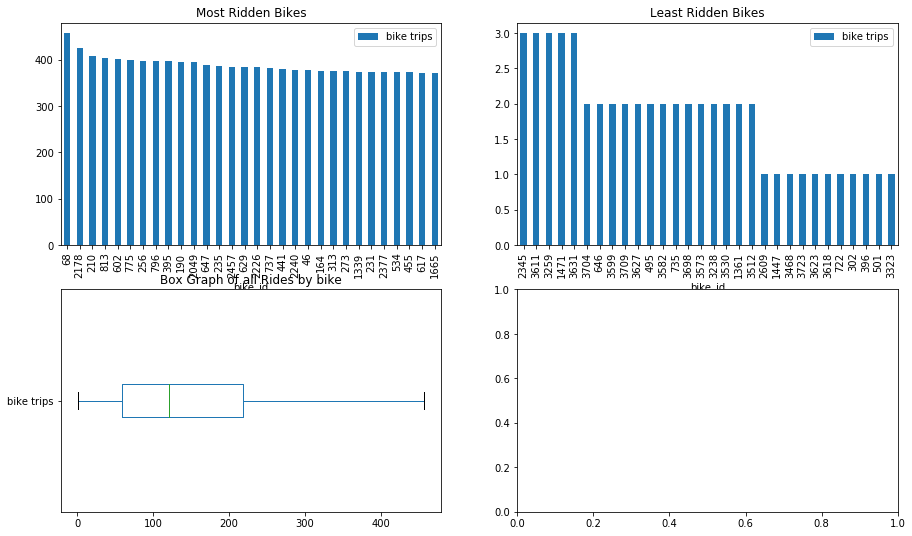

In [15]:
bike_id_count=df[['bike_id','duration_sec']].groupby(['bike_id']).count().sort_values('duration_sec', ascending=False)
# use sum with duration seconds to see which bike was the most ridden
bike_id_index = bike_id_count.index.values
bike_id_count.columns=['bike trips']
fig, axes = plt.subplots(nrows=2, ncols=2)
bike_id_count.head(30).plot(ax=axes[0,0],kind='bar', figsize=(15,9))
axes[0,0].set_title('Most Ridden Bikes')
bike_id_count.tail(30).plot(ax=axes[0,1],kind='bar', figsize=(15,9))
axes[0,1].set_title('Least Ridden Bikes')
bike_id_count.plot.box(ax=axes[1,0], figsize=(15,9),vert=False)
axes[1,0].set_title('Box Graph of all Rides by bike')

Text(0.5,1,'Box Graph of seconds rode by bike')

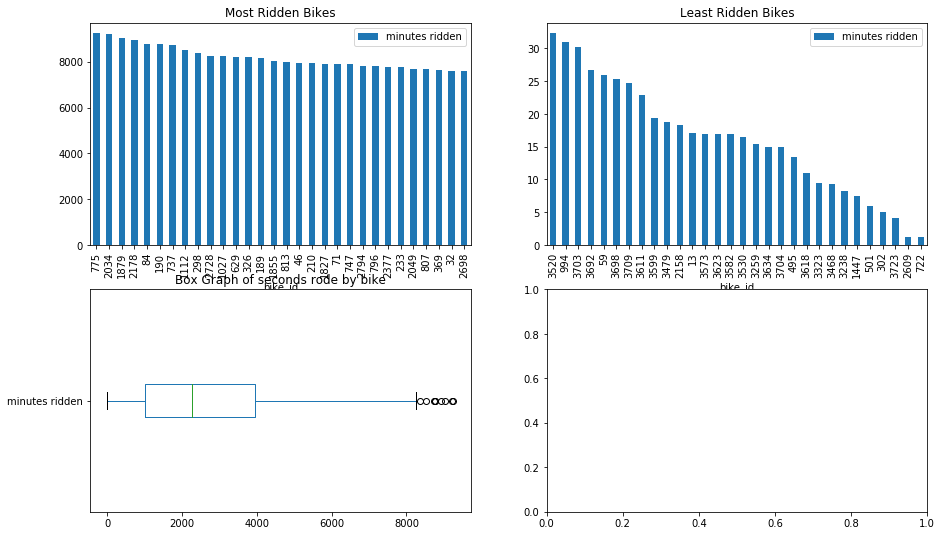

In [16]:
bike_id_sum=df[['bike_id','duration_sec']].groupby(['bike_id']).sum().sort_values('duration_sec', ascending=False)

bike_id_sum.columns=['Seconds Ridden']
bike_id_sum['Seconds Ridden']=bike_id_sum['Seconds Ridden']/60
bike_id_sum.columns=['minutes ridden']
fig, axes = plt.subplots(nrows=2, ncols=2)
bike_id_sum.head(30).plot(ax=axes[0,0],kind='bar', figsize=(15,9))
axes[0,0].set_title('Most Ridden Bikes')
bike_id_sum.tail(30).plot(ax=axes[0,1],kind='bar', figsize=(15,9))
axes[0,1].set_title('Least Ridden Bikes')
bike_id_sum.plot.box(ax=axes[1,0], figsize=(15,9),vert=False)
axes[1,0].set_title('Box Graph of seconds rode by bike')
#bike_id_time_df = pd.DataFrame()
#bike_id_time_df
#for m in range(0,19):
    #temp_df=df[df['bike_id']==bike_id_index[m]]
    #temp_index = temp_df.index.values
    #temp_index_df = pd.DataFrame({'{}'.format(bike_id_index[m]):temp_index})
    #bike_id_time_df=pd.concat([bike_id_time_df,temp_index_df], axis=1)
#bike_id_time_df_T = bike_id_time_df.T
#bike_id_time_df
#make a for loop that goes through top 20 and inserts it to a new df with index being time and each column being the the bike id corresponding to that start time

Text(0,0.5,'number of total minutes')

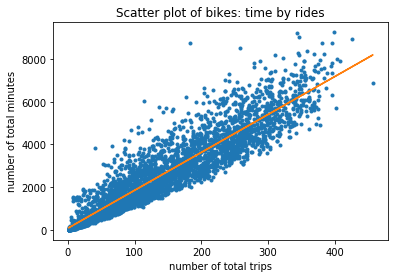

In [17]:
bike_id_count_sum = pd.concat([bike_id_count,bike_id_sum], axis=1)
# Fit with polyfit
m, b = np.polyfit(bike_id_count_sum['bike trips'], bike_id_count_sum['minutes ridden'], 1)

plt.plot(bike_id_count_sum['bike trips'], bike_id_count_sum['minutes ridden'], '.')
plt.plot(bike_id_count_sum['bike trips'], b + m * bike_id_count_sum['bike trips'], '-')
plt.title('Scatter plot of bikes: time by rides')
plt.xlabel('number of total trips')
plt.ylabel('number of total minutes')
#plt.show()
#bike_id_count_sum.plot.scatter(x='bike trips', y='minutes ridden', figsize=(15,10))
#bike_id_count_sum.plot(x='bike trips', y='minutes ridden', figsize=(15,10))

In [18]:
# approximate radius of earth in km
#R = 6373.0
#df_temp_dist_bike=df[['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','duration_sec','bike_id']].groupby(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','bike_id']).count().sort_values('bike_id', ascending=False).reset_index()
#df_temp_dist=df[['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','duration_sec']].groupby(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).count().sort_values('duration_sec', ascending=False).reset_index()

In [19]:
#distance_df = np.arange(len(df_temp_dist),dtype=np.float)
#for m in range(0,len(df_temp_dist)):
    #start_lat = math.radians(df_temp_dist.reset_index().loc[m,'start_station_latitude'])
    #start_long = math.radians(df_temp_dist.reset_index().loc[m,'start_station_longitude'])
    #end_lat = math.radians(df_temp_dist.reset_index().loc[m,'end_station_latitude'])
    #end_long = math.radians(df_temp_dist.reset_index().loc[m,'end_station_longitude'])
    
    #dlon = end_long - start_long
    #dlat = end_lat - start_lat

    #a = math.sin(dlat / 2)**2 + math.cos(start_lat) * math.cos(end_lat) * math.sin(dlon / 2)**2
    #c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    #distance_df[m] = R * c
    #if m > 20020:
        #print("{} value at index - {}".format(R*c,m))
#df_temp_dist['distance']=distance_df
#distance_df

In [20]:
#df_temp_dist_array = df[['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','duration_sec','bike_id']].groupby(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'])['bike_id'].apply(list).reset_index()
#df_temp_dist_bike=df_temp_dist_bike.sort_values(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], ascending=[False,False,False,False])
#df_temp_dist=df_temp_dist.sort_values(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], ascending=[False,False,False,False])
#df_temp_dist_array=df_temp_dist_array.sort_values(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], ascending=[False,False,False,False])
#df_temp_dist_array['distance']=df_temp_dist['distance']
#df_temp_dist_array

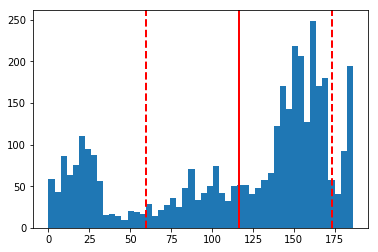

In [85]:
df_bike_age=df[['bike_id','start_time']].groupby('bike_id').agg([np.max,np.min,np.count_nonzero])
df_bike_age.columns=['last date','first date','trip count']
df_bike_age['age']= abs((df_bike_age['last date'] - df_bike_age['first date']))
df_bike_age['delta_2018']= abs(df_bike_age['last date'] - datetime(2018, 1, 1, 0, 0))
df_bike_age['age']=df_bike_age['age'].dt.days
df_bike_age['delta_2018']=df_bike_age['delta_2018'].dt.days
df_bike_age=df_bike_age.reset_index()
plt.hist(df_bike_age['age'],bins=50)
plt.axvline(df_bike_age['age'].mean(), color='r', linestyle='solid', linewidth=2)
plt.axvline(df_bike_age['age'].mean()+df_bike_age['age'].std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df_bike_age['age'].mean()-df_bike_age['age'].std(), color='r', linestyle='dashed', linewidth=2)
#df_bike_age.hist(column='age',stacked=True, bins=50)
#df_bike_age.hist(column='age gap',stacked=True, bins=50)
#df_bike_age.plot(kind='bar',x=df_bike_age['bike id'], y=df_bike_age['trip count'])
#plt.bar(x=df_bike_age['bike id'], height=df_bike_age['age gap'])
#plt.bar(x=df_bike_age['bike id'], height=df_bike_age['age'])
#y = df_bike_age['age']
#ax = plt.subplot()
#ax.bar(df.index.sort_values(), y)
#ax.yaxis.set_major_locator(DayLocator())
#ax.yaxis.set_major_formatter(DateFormatter('%D'))
#mul

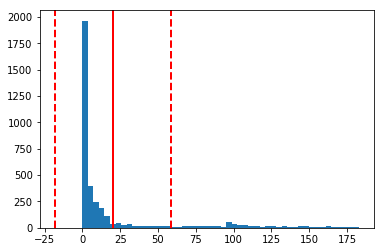

In [86]:
plt.hist(df_bike_age['delta_2018'],bins=50)
plt.axvline(df_bike_age['delta_2018'].mean(), color='r', linestyle='solid', linewidth=2)
plt.axvline(df_bike_age['delta_2018'].mean()+df_bike_age['delta_2018'].std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df_bike_age['delta_2018'].mean()-df_bike_age['delta_2018'].std(), color='r', linestyle='dashed', linewidth=2)

## NEED TO DO
1. Find distance by bike ID - DO NOT DO, MEMORY ERRORS OCCOR
2. Look back and do analytical notes, means, STD, so on - DONE
3. Piosson Graph of age and age gaps to find with ones are not used
4. look at age and age gap of most used bikes
5. do piosson graph of most used bikes
6. do an mean of hours, day, and weeks - DONE

In [22]:
df_bike_age['out of commision']=df_bike_age['age gap'].apply(lambda x:x>25)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C55FD30>]],
      dtype=object)

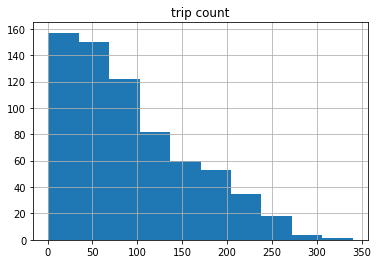

In [23]:
df_bike_age[df_bike_age['out of commision']==True].hist(column='trip count')

In [24]:
min_date=df_bike_age['first date'].min()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C3C1ED0>]],
      dtype=object)

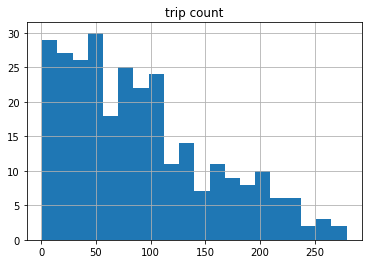

In [25]:
from datetime import timedelta
df_bike_age[(df_bike_age['first date']>min_date+timedelta(days=25))&(df_bike_age['out of commision']==True)].hist(column='trip count',bins=20)